In [1]:
import sys
sys.path.append("../")
import numpy as np
import os
import glob
import cv2
import csv
from utils import Tsurff, DistAverage
import pandas as pd
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
from pathlib import Path
import napari
from numpy import diff, polyfit

In [11]:
Embryo = '/Users/aimachine/Dpachys_10/Dpachys_control.tif'
EmbryoSeg = '/Users/aimachine/Dpachys_10/SegDpachys_control.tif'
savedir = '/Users/aimachine/Dpachys_10/Results/'
Path(savedir).mkdir(exist_ok = True)
Xcalibration = 1 #0.034
Timeunit = 1 #10
theta = 30
fitdegree = 3

In [3]:
ListMaps, Clock, time = Tsurff(Embryo,EmbryoSeg, theta,Timeunit)

100%|██████████| 370/370 [00:50<00:00,  7.36it/s]


In [15]:
with napari.gui_qt():
              viewer = napari.view_image(imread(Embryo), name='TSURFF')
              viewer.add_labels(Clock) 

In [5]:
AnteriorAngles = [0,10,20,30,40,50,60,70,80,90,100,110,120 ]
PosteriorAngles = [200,210,220,230, 240,250,260, 270,280, 330]


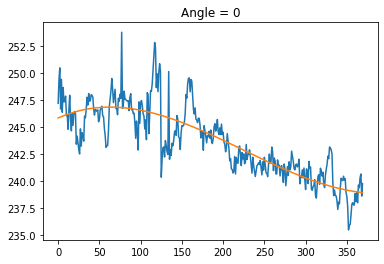

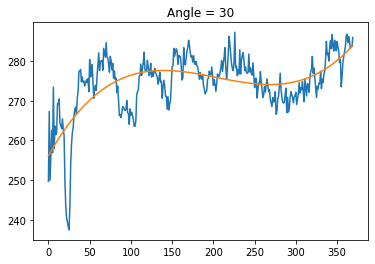

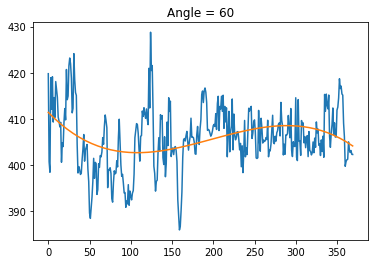

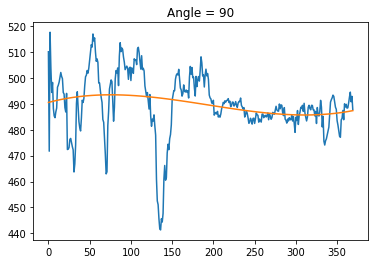

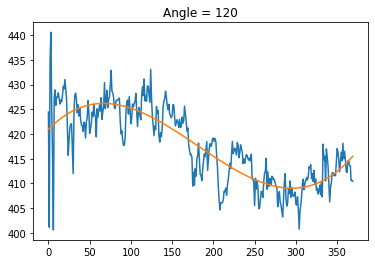

Anterior Deformation: Mean =  1831.1834109470615 Standard Deviation =  9.129864216898342


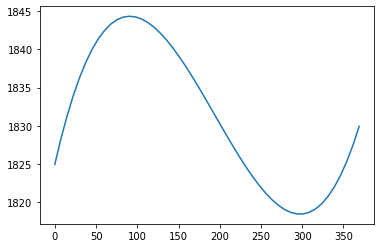

In [23]:
AnteriorAveragePoly = 0

for i in range(0, len(ListMaps)):
    
    AngleHashmap = ListMaps[i]
    for (angle,timeddistance) in AngleHashmap.items():
        for i in range(0, len(AnteriorAngles)):
                
                if angle == str(AnteriorAngles[i]):
                        timeddistance = DistAverage(timeddistance, 1)
                        timeddistance = [i * Xcalibration/Timeunit for i in timeddistance]
                        deformation = timeddistance
                        coefficients = polyfit(time[0:], deformation, fitdegree)
                        poly = np.poly1d(coefficients)
                        plt.plot(time[0:],deformation)
                        Anteriornew_x = np.linspace(time[0:][0], time[0:][-1])
                        Anteriornew_y = poly(Anteriornew_x)
                        AnteriorAveragePoly = AnteriorAveragePoly + Anteriornew_y
                        plt.plot(Anteriornew_x,Anteriornew_y)
                        plt.title( 'Angle = ' + str(angle))
                        plt.show()
                        
plt.plot(Anteriornew_x,AnteriorAveragePoly)    
print('Anterior Deformation:', 'Mean = ',np.mean(AnteriorAveragePoly), 'Standard Deviation = ', np.std(AnteriorAveragePoly))
                        

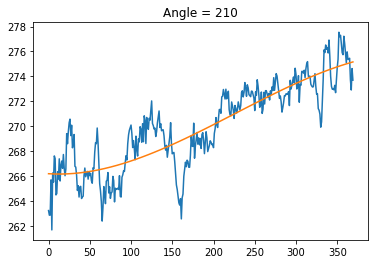

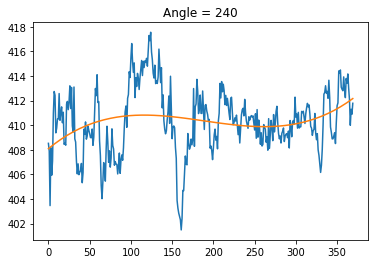

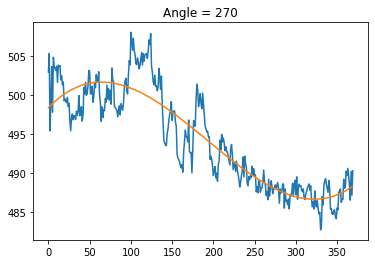

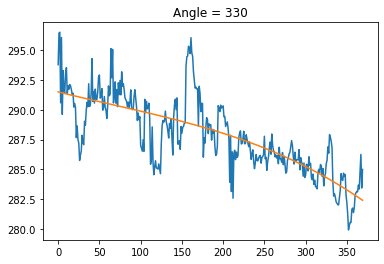

Anterior Deformation: Mean =  1462.5055770263111 Standard Deviation =  5.036369199008623


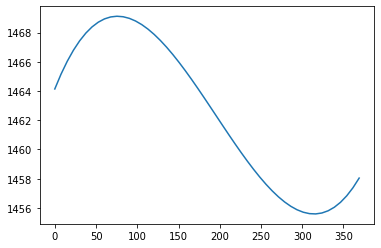

In [24]:
PosteriorAveragePoly = 0
for i in range(0, len(ListMaps)):
    
    AngleHashmap = ListMaps[i]
    for (angle,timeddistance) in AngleHashmap.items():
        for i in range(0, len(PosteriorAngles)):
                
                if angle == str(PosteriorAngles[i]):
                        timeddistance = DistAverage(timeddistance, 1)
                        timeddistance = [i * Xcalibration/Timeunit for i in timeddistance]
                        deformation = timeddistance
                        coefficients = polyfit(time[0:], deformation, fitdegree)
                        poly = np.poly1d(coefficients)
                        plt.plot(time[0:],deformation)
                        Posteriornew_x = np.linspace(time[0:][0], time[0:][-1])
                        Posteriornew_y = poly(Posteriornew_x)
                        PosteriorAveragePoly = PosteriorAveragePoly + Posteriornew_y
                        plt.plot(Posteriornew_x,Posteriornew_y)
                        plt.title( 'Angle = ' + str(angle))
                        plt.show()
                        
                       
plt.plot(Posteriornew_x,PosteriorAveragePoly)    
print('Anterior Deformation:', 'Mean = ',np.mean(PosteriorAveragePoly), 'Standard Deviation = ', np.std(PosteriorAveragePoly))
                        

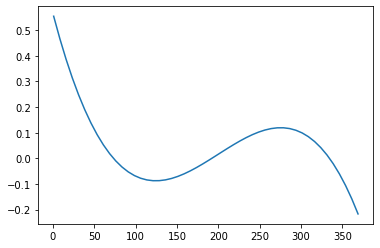

In [14]:
plt.plot(Posteriornew_x,PosteriorAveragePoly - AnteriorAveragePoly) 